## Machine Learning

* **Supervised Learning**:
    Models that can predict labels based on labeled training data.
    
* **Classification**:
    Models that predict labels as two or more discrete categories.

* **Regression**:
    Models that predict continuous labels.

* **Unsupervised Learning**:
    Models that identify structure in unlabeled data.

* **Clustering**:
    Models that detect and identify distinct groups in the data.

* **Dimensionality Reduction**:
    Models that detect and identify lower-dimensional structure in higher-dimensional data.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


- Each row of the data is a single observed flower, the number of rows is the total number of flowers in the dataset.

In general, rows of the matrix are *samples*, and the number of rows are *n_samples*.

- Each columns of the data is a particular quantitative piece of information that describes each sample.

In general, columns of the matrix are *features*, and the number of columns are *n_features*.

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Feature matrix shape (X): [n_samples, n_features]

Target (label) array (y): [n_samples,]

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

1) Choose a class of model by importing the appropriate estimator class from Sklearn.

2) Choose model hyperparameters by instantiating this class with desidered values.

3) Arrange data into a feature matrix and target vector.

4) Fit the model to your data by calling fit() method of the model instance.

5) Apply the model to new data:
    * For supervised learning: 
    often predict labels for unknown data using predict() 
    method.
    
    * For unsupervised learning: 
    often transform or infer properties of data using 
    transform() or predict() method.

#### Supervised learning example: Simple linear regression

In [5]:
rng = np.random.RandomState(42)

In [6]:
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

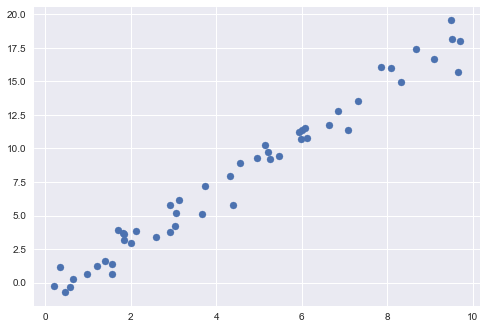

In [7]:
plt.scatter(x, y)
plt.show()

In [8]:
# 1
from sklearn.linear_model import LinearRegression

In [9]:
# 2: we must choose good hyperparamenters, for now we use some
# already known hyperparameters for this problem
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [10]:
# 3
# must correct form of X
print(x.shape)
X = x[:, np.newaxis]
print(X.shape)

(50,)
(50, 1)


In [11]:
# form for y is ok
y.shape

(50,)

In [12]:
# 4
model.fit(X, y)

LinearRegression()

$y = 2x - 1$

coef = 2

intercept = -1

In [13]:
# very close to original
model.coef_

array([1.9776566])

In [14]:
# very close to original
model.intercept_

-0.9033107255311164

In [15]:
# 5
# new data
xfit = np.linspace(-1, 11)

In [16]:
print(xfit.shape)
Xfit = xfit[:, np.newaxis]
print(Xfit.shape)

(50,)
(50, 1)


In [17]:
yfit = model.predict(Xfit)

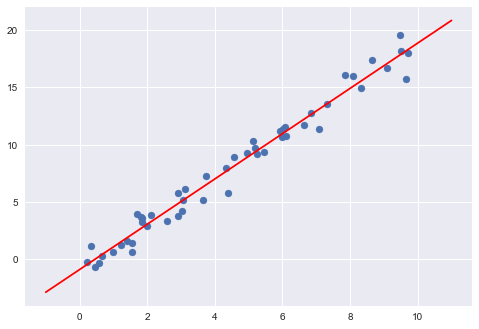

In [18]:
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.show()

#### Supervised learning example: Iris classification

In [19]:
# given the model on a portion on of the data, predict the
# remaining data

# we use a simple generative model: Gaussian naive Bayes, which 
# proceeds by assuming each class is drawn from an axis-aligned
# Gaussian distribution

# no hyperparameters required, good model to use as a baseline
# classification before improvements through more sophisticated ones

from sklearn.model_selection import train_test_split

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                               random_state=1)

In [21]:
# choose model class
from sklearn.naive_bayes import GaussianNB
# instantiate model
model = GaussianNB()
# fit model to data
model.fit(Xtrain, ytrain)
# predict on new data
y_model = model.predict(Xtest)

In [22]:
# now we use accuracy_score utility to see the fraction of
# predicted labels that match their true value

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

With an accuracy topping 97%, even the very naive classification algorithm is effective on this dataset!

#### Unsupervised learning example: Iris dimensionality

Let's reduce the dimensionality of Iris data so as to more visualize it.

Iris data is 4 dimensional.

We want to reduce dimension from 4 to 2, in order to plot data in 2 dimension.

We'll use PCA (Principal Component Analysis), a fast linear dimensionality reduction technique.

In [23]:
# choose model class
from sklearn.decomposition import PCA
# instantiate model with hyperparameters
model = PCA(n_components=2)
# fit to data (notice: no y (unsupervised))
model.fit(X_iris)
# transform the data to 2 dimensions
X_2D = model.transform(X_iris)

In [25]:
X_2D.shape

(150, 2)

In [26]:
X_iris.shape

(150, 4)

In [32]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

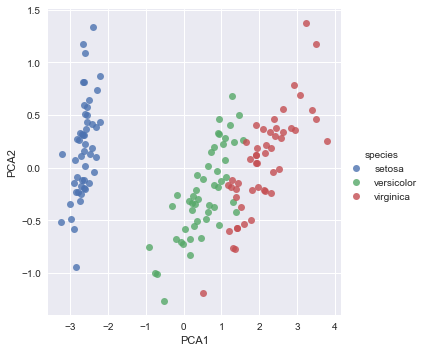

In [37]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

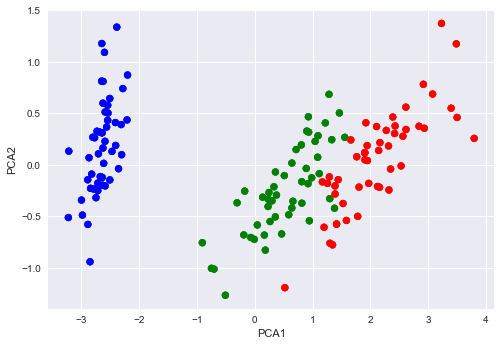

In [49]:
colors = ['blue' if i == 'setosa' else 'green' if i == 'versicolor' else 'red' for i in iris['species']]
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=colors)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
# todo legend
plt.show()